# EDA 목차

## 0. 분석 환경 확인

## 1. 패키지 로드

## 2. 데이터 로드

## 3. 시각화 함수 및 통계 검증 함수 저장

## 4. 기술통계량 확인

## 5. 개별 변수 시각화

## 6. 통계적 검증

## 7. 시각적 데이터 탐색

## 0.분석 환경 확인

In [72]:
import os
#현재 디렉토리 확인
print(os.getcwd())
# 분석 디렉토리로 이동
os.chdir('C:\\Users\\user\\Desktop\\법무부_파이썬분석\\시연관련데이터')
print(os.getcwd())

C:\Users\user\Desktop\법무부_파이썬분석\시연관련데이터
C:\Users\user\Desktop\법무부_파이썬분석\시연관련데이터


## 1. 패키지 로드

In [73]:
# 라이브러리 import
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import warnings
sns.set(font="Malgun Gothic")
warnings.filterwarnings('ignore')
from scipy.stats import kruskal
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

## 2. 데이터 로드

In [74]:
os.listdir()

['.ipynb_checkpoints',
 '.Rhistory',
 '1) 21~23년 신청현황 (지역, 인원, 작물종류, 면적, 배정인원)_ver2.csv',
 '1) `21~23년 신청현황 (지역, 인원, 작물종류, 면적, 배정인원)1.xlsx',
 '12) 허용(적용)작물별 품목 분류 (법무부_농림부 농업경영체등록 통계 서비스 품목코드).xlsx',
 '1차final.csv',
 '2) `15~23년 통계수치 (지역별 배정,입국,체류,출국,이탈).xlsx',
 '2021년농업경영체현황(농업인)_지역별농업인현황_20231024143749.xlsx',
 '2022년농업경영체현황(농업인)_지역별농업인현황_20231024143721.xlsx',
 '3)5)21~23년 참여자 현황 (지역, 유형, 국적, 체류자격, 성별, MOU, 출국, 이탈)1.xlsx',
 '6) 농업경영체 등록정보1.xlsx',
 '8)15~22년 농촌 농업경영체 현황현황 (지역)_(농림부).xlsx',
 'code',
 '최종분석데이터셋_엄태원.csv']

In [75]:
data=pd.read_csv(os.listdir()[13],encoding='EUC-KR')
data=data.query('합계!=0')

### 3. 시각화 및 통계 검증 함수 저장

In [76]:
#빈도테이블 생성
def count(x):
    data1=pd.DataFrame(x.value_counts()).reset_index()
    data1.columns=['category','빈도수']
    return data1

In [77]:
#barplot
def bargraph(x,y,x_label,y_label,figsize1,figsize2,data):
    plt.figure(figsize=(figsize1, figsize2))
    if data[x].dtypes=='int64':
        data[x]=data[x].astype('str')
    data=data.sort_values(by=y,ascending=False).reset_index()
    
    for index, row in data.iterrows():
        g=sns.barplot(x,y,data=data)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        g.text(index,row[y],row[y],color='black',ha='center')

In [78]:
#파이차트
def pie_chart(x, y, data, figsize1, figsize2):
    plt.figure(figsize=(figsize1, figsize2))
    length = len(data)
    my_list = [0.05] * length
    plt.pie(y,
            labels=x,
            autopct='%.f%%',
            startangle=90,
            counterclock=True,
            shadow=True,
            explode=my_list 
           )
    plt.show()

In [79]:
#비모수 검정
def Kruskal_wallis(x,y,data): #x그룹화할 변수, y검정할 연속형 변수 등
    grouped=data.groupby(x)
    for i,group in grouped:
        groups = [group[y].tolist() for _, group in grouped] 
    result=kruskal(*groups) #* 메소드로 그룹화 풀어서 리스트별 적용
    
    if result.pvalue <0.05:
        print(f'p-value가 유의수준 0.05 보다 작기 때문에 {x}별의 {y}의 차이가 없다는 귀무가설은 기각됩니다. {x}간의 {y}차이는 유의미합니다')
    else:
        print('{x}별 {y}의 차이는 유의미하지 않습니다')
        
    if result.pvalue < 0.05:
        print(f'{x}별 {y}의 차이를 시각적으로 확인합니다')
        plt.figure(figsize=(12, 5))
        sns.boxplot(data=data,x=x,y=y)
    else:
        pass

In [80]:
def Anova_test(x,y,data):
    grouped=data.groupby(x)
    for i, group in grouped:
        groups=[group[y].tolist() for _,group in grouped]
    f_statistic, p_value=f_oneway(*groups)
    if p_value < 0.05:
        print(f'p-value가 유의수준 0.05 보다 작기 때문에 {x}별의 {y}의 차이가 없다는 귀무가설은 기각됩니다. {x}간의 {y}차이는 유의미합니다')
    else:
        print('{x}별 {y}의 차이는 유의미하지 않습니다')
        
    if p_value < 0.05:
        print(f'{x}별 {y}의 차이를 시각적으로 확인합니다')
        plt.figure(figsize=(12, 5))
        sns.boxplot(data=data,x=x,y=y)
    else:
        pass

In [81]:
def T_test(x,y,data):
    grouped=data.groupby(x)
    for i,group in grouped:
        groups = [group[y].tolist() for _, group in grouped] 
    t_statistic, p_value = stats.ttest_ind(*groups,equal_var=True)
    if p_value < 0.05:
        print(f'p-value가 유의수준 0.05 보다 작기 때문에 {x}별의 {y}의 차이가 없다는 귀무가설은 기각됩니다. {x}간의 {y}차이는 유의미합니다')
    else:
        print('{x}별 {y}의 차이는 유의미하지 않습니다')
    if p_value < 0.05:
        print(f'{x}별 {y}의 차이를 시각적으로 확인합니다')
        plt.figure(figsize=(12, 5))
        sns.boxplot(data=data,x=x,y=y)
    else:
        pass

## 4. 기술통계량 확인

In [82]:
round(data[['배정신청 인원','지자체추가배정인원','농지면적(실제경작)','전년대비농경체증감률','고령농경체비율','전년도이탈인원']].describe(),3)

,배정신청 인원,지자체추가배정인원,농지면적(실제경작),전년대비농경체증감률,고령농경체비율,전년도이탈인원
count,12449.000,12449.000,12449.000,12449.000,12449.000,12449.000
mean,3.362,0.033,0.496,102.359,53.464,0.092
std,2.027,0.289,0.594,0.999,4.310,0.511
min,0.000,-2.000,0.000,99.500,39.370,0.000
25%,2.000,0.000,0.250,101.800,51.030,0.000
50%,3.000,0.000,0.360,102.300,53.630,0.000
75%,5.000,0.000,0.550,103.000,56.230,0.000
max,12.000,9.000,22.090,107.500,63.720,11.000


## 5. 개별 변수 시각화

### 5.1 연도별 신청 경영체 수

In [83]:
data1=count(data['비고'])

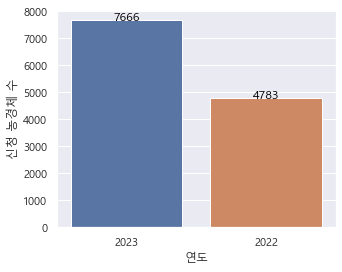

In [84]:
bargraph('category','빈도수','연도','신청 농경체 수',5,4,data1)

### 5.2 시도별 신청현황

In [85]:
data1=count(data['지자체명_시도'])

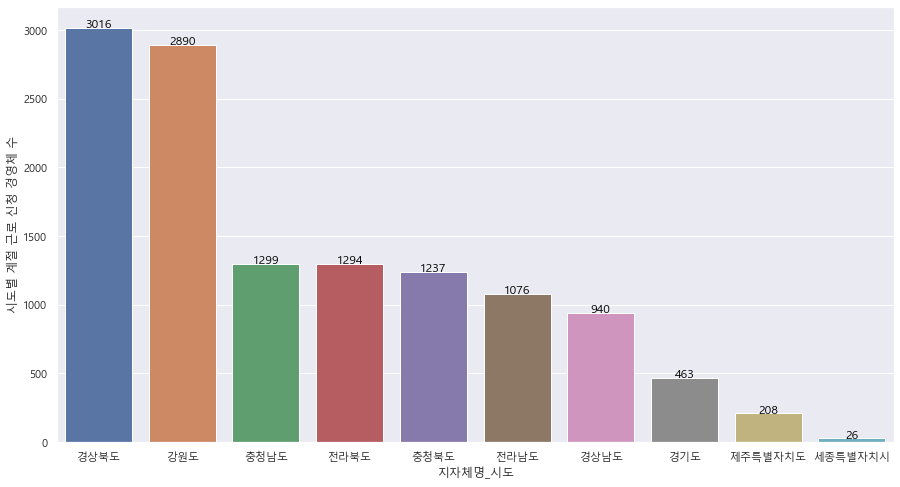

In [86]:
bargraph('category','빈도수','지자체명_시도','시도별 계절 근로 신청 경영체 수',15,8,data1)

### 5.3 2022년 시도별 현황

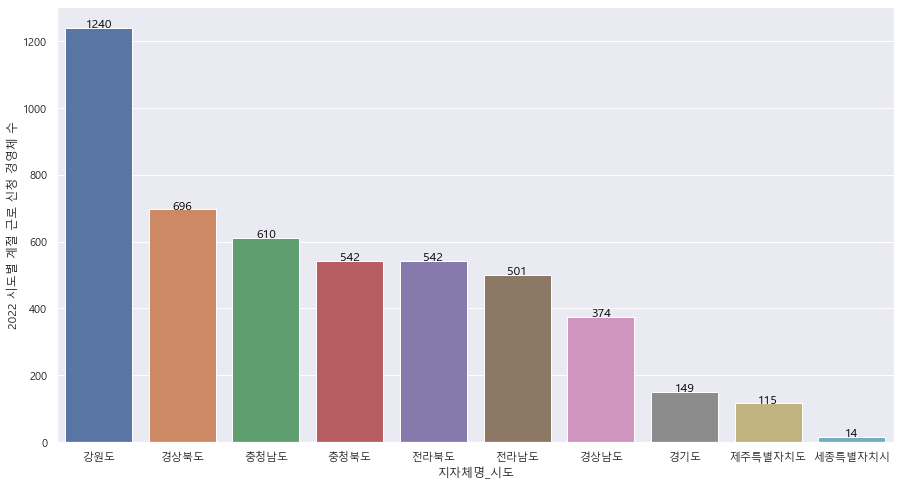

In [87]:
data_2022=data.query('비고==2022')
data1=count(data_2022['지자체명_시도'])
bargraph('category','빈도수','지자체명_시도','2022 시도별 계절 근로 신청 경영체 수',15,8,data1)

### 5.4 2023년 시도별 현황

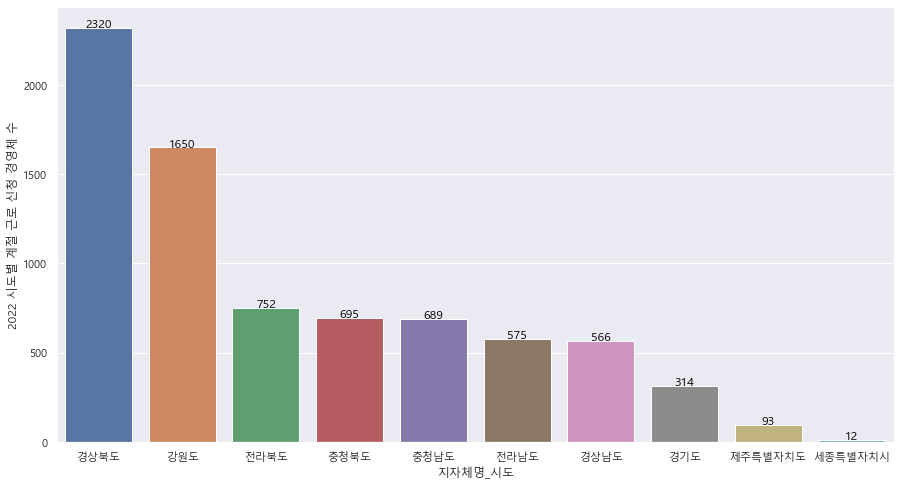

In [88]:
data_2023=data.query('비고==2023')
data1=count(data_2023['지자체명_시도'])
bargraph('category','빈도수','지자체명_시도','2022 시도별 계절 근로 신청 경영체 수',15,8,data1)

### 5.5 경상북도 현황

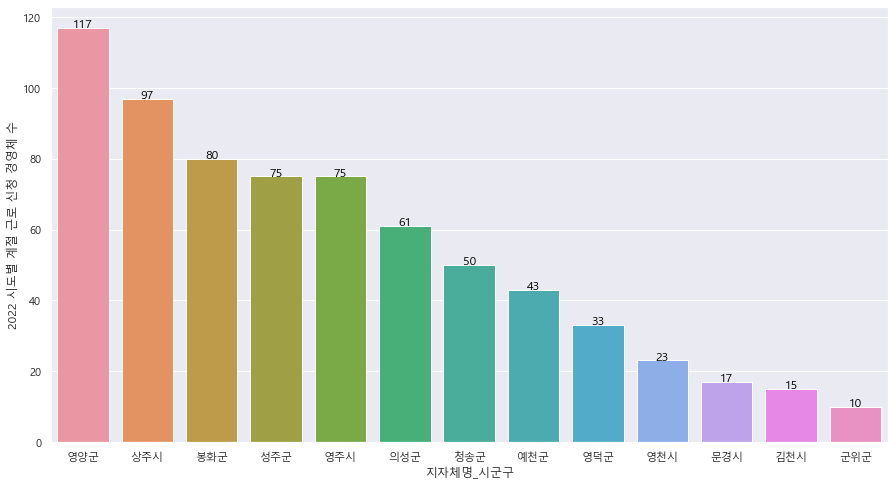

In [89]:
data_2022_경북=data_2022[data_2022['지자체명_시도']=='경상북도']
data1=count(data_2022_경북['지자체명_시군구'])
bargraph('category','빈도수','지자체명_시군구','2022 시도별 계절 근로 신청 경영체 수',15,8,data1)

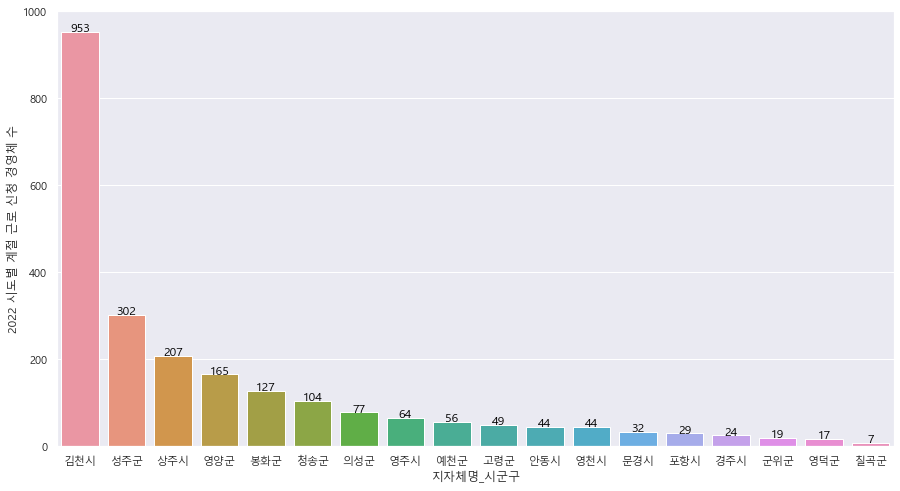

In [90]:
data_2023_경북=data_2023[data_2023['지자체명_시도']=='경상북도']
data1=count(data_2023_경북['지자체명_시군구'])
bargraph('category','빈도수','지자체명_시군구','2022 시도별 계절 근로 신청 경영체 수',15,8,data1)

### 5.6 연도별 현황

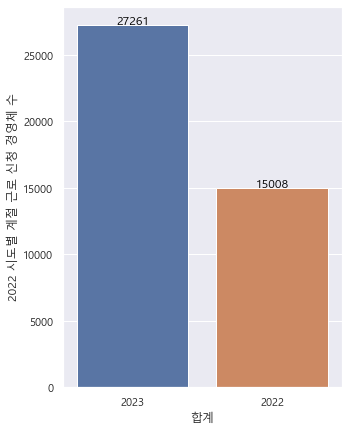

In [91]:
sum_of_apply=data.groupby('비고').sum().reset_index()
bargraph('비고','합계','합계','2022 시도별 계절 근로 신청 경영체 수',5,7,sum_of_apply)

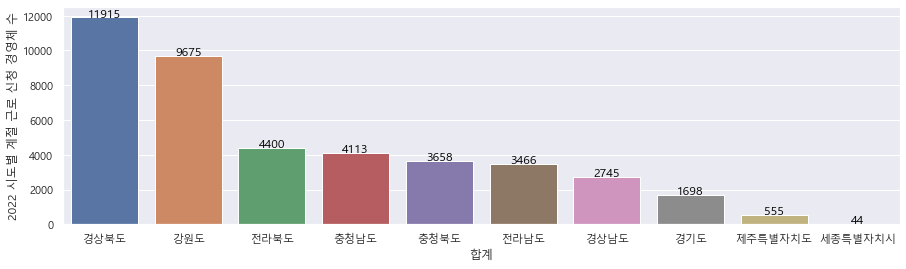

In [92]:
sum_of_apply=data.groupby('지자체명_시도').sum('합계').reset_index()
bargraph('지자체명_시도','합계','합계','2022 시도별 계절 근로 신청 경영체 수',15,4,sum_of_apply)

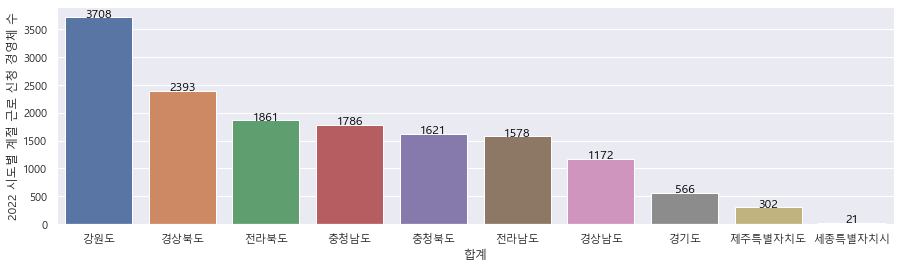

In [93]:
sum_of_apply=data_2022.groupby('지자체명_시도').sum('합계').reset_index()
bargraph('지자체명_시도','합계','합계','2022 시도별 계절 근로 신청 경영체 수',15,4,sum_of_apply)

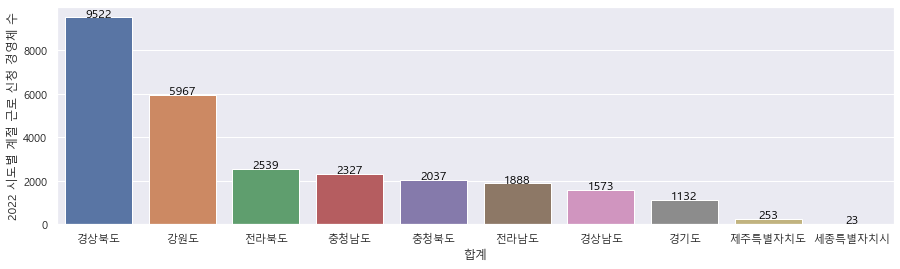

In [94]:
sum_of_apply=data_2023.groupby('지자체명_시도').sum('합계').reset_index()
bargraph('지자체명_시도','합계','합계','2022 시도별 계절 근로 신청 경영체 수',15,4,sum_of_apply)

### 5.7 개별 변수 탐색-파이차트

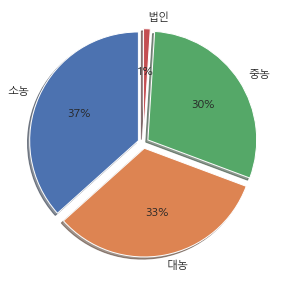

In [95]:
data1=count(data['구분'])
data1['비율']=round((data1['빈도수']/sum(data1['빈도수'])),2)
pie_chart(data1['category'],data1['비율'],data=data1,figsize1=5,figsize2=5)

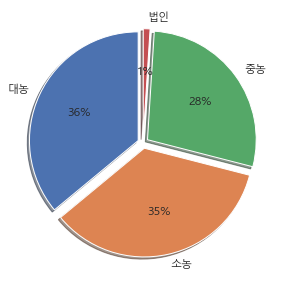

In [96]:
data1=count(data_2022['구분'])
data1['비율']=round((data1['빈도수']/sum(data1['빈도수'])),2)
pie_chart(data1['category'],data1['비율'],data=data1,figsize1=5,figsize2=5)

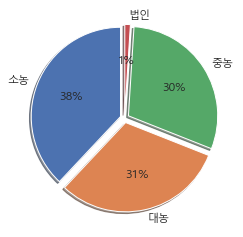

In [97]:
data1=count(data_2023['구분'])
data1['비율']=round((data1['빈도수']/sum(data1['빈도수'])),2)
pie_chart(data1['category'],data1['비율'],data=data1,figsize1=4,figsize2=5)

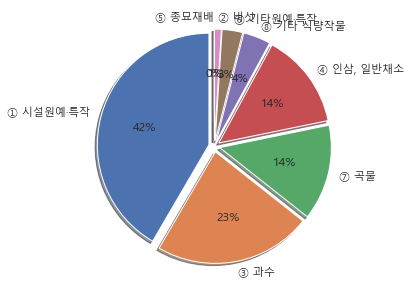

In [98]:
data1=count(data['작물 종류'])
data1['비율']=round((data1['빈도수']/sum(data1['빈도수'])),2)
pie_chart(x=data1['category'],y=data1['비율'],data=data1,figsize1=5,figsize2=10)

## 6. 통계적 검정

- Kruskal Wallis 검정
- Anova 검정
- duncan 검정(아노바 사후검정)
- Boxplot

### 6.1 비모수 검정

p-value가 유의수준 0.05 보다 작기 때문에 작물 종류별의 합계의 차이가 없다는 귀무가설은 기각됩니다. 작물 종류간의 합계차이는 유의미합니다
작물 종류별 합계의 차이를 시각적으로 확인합니다


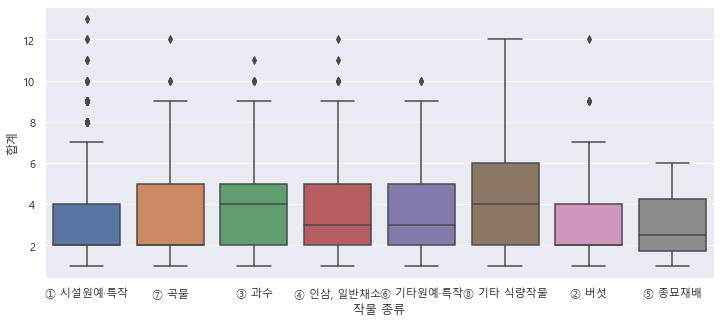

In [99]:
Kruskal_wallis('작물 종류','합계',data)

p-value가 유의수준 0.05 보다 작기 때문에 구분별의 합계의 차이가 없다는 귀무가설은 기각됩니다. 구분간의 합계차이는 유의미합니다
구분별 합계의 차이를 시각적으로 확인합니다


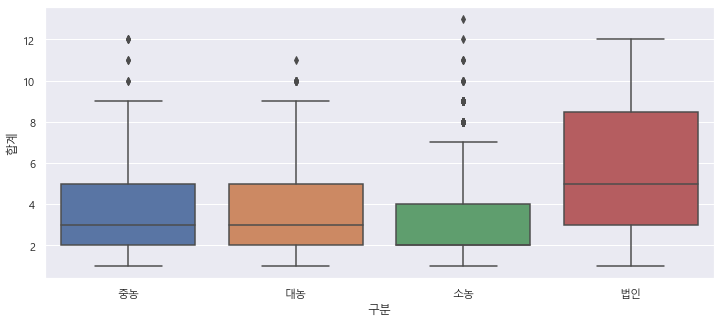

In [100]:
Kruskal_wallis('구분','합계',data)

### 6.2 모수 검정(Anova 검정)

p-value가 유의수준 0.05 보다 작기 때문에 작물 종류별의 합계의 차이가 없다는 귀무가설은 기각됩니다. 작물 종류간의 합계차이는 유의미합니다
작물 종류별 합계의 차이를 시각적으로 확인합니다


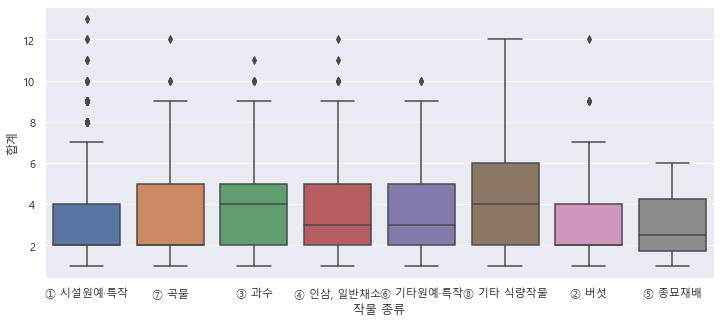

In [101]:
Anova_test('작물 종류','합계',data)

### 6.3 사후검정

In [102]:
tukey_results = pairwise_tukeyhsd(data['합계'], data['작물 종류'])
print(tukey_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
 ① 시설원예·특작       ② 버섯    0.156    0.9  -0.559   0.871  False
 ① 시설원예·특작       ③ 과수   0.7589  0.001  0.6174  0.9004   True
 ① 시설원예·특작 ④ 인삼, 일반채소   0.7489  0.001  0.5781  0.9196   True
 ① 시설원예·특작     ⑤ 종묘재배    0.022    0.9 -1.2276  1.2715  False
 ① 시설원예·특작  ⑥ 기타원예·특작   0.4067 0.0085  0.0615  0.7519   True
 ① 시설원예·특작       ⑦ 곡물   0.1889 0.0162  0.0199   0.358   True
 ① 시설원예·특작  ⑧ 기타 식량작물   1.5837  0.001  1.2879  1.8796   True
      ② 버섯       ③ 과수   0.6029 0.1777 -0.1161  1.3219  False
      ② 버섯 ④ 인삼, 일반채소   0.5929 0.2048 -0.1324  1.3182  False
      ② 버섯     ⑤ 종묘재배   -0.134    0.9 -1.5687  1.3007  False
      ② 버섯  ⑥ 기타원예·특작   0.2508    0.9 -0.5342  1.0357  False
      ② 버섯       ⑦ 곡물   0.0329    0.9  -0.692  0.7579  False
      ② 버섯  ⑧ 기타 식량작물   1.4278  0.001  0.6633  2.1923   True
      ③ 과수 ④ 인삼, 일반채소   

In [103]:
tukey_results = pairwise_tukeyhsd(data['합계'], data['구분'])
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    대농     법인   1.8404 0.001  1.3554  2.3254   True
    대농     소농   -0.604 0.001 -0.7163 -0.4917   True
    대농     중농  -0.4145 0.001 -0.5332 -0.2958   True
    법인     소농  -2.4444 0.001 -2.9286 -1.9602   True
    법인     중농  -2.2549 0.001 -2.7407 -1.7692   True
    소농     중농   0.1895 0.001   0.074   0.305   True
---------------------------------------------------


### 6.4 모수 검정(T-test 검정)

p-value가 유의수준 0.05 보다 작기 때문에 전년도활용여부별의 합계의 차이가 없다는 귀무가설은 기각됩니다. 전년도활용여부간의 합계차이는 유의미합니다
전년도활용여부별 합계의 차이를 시각적으로 확인합니다


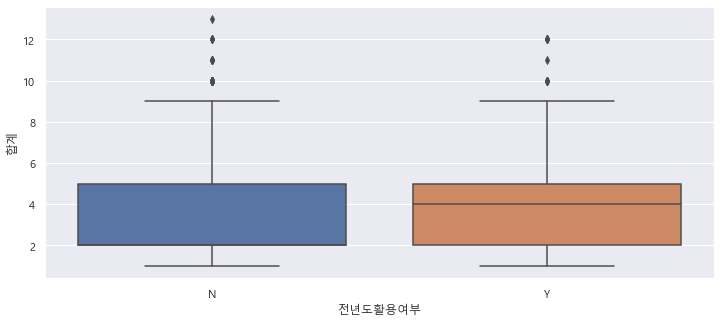

In [104]:
T_test('전년도활용여부','합계',data=data)

## 7. 시각적 데이터 탐색

### 7.1 평균 배정 신청 인원 5명 이상 상위 지자체 EDA

In [ ]:
#빈도테이블 생성
def count(x):
    data1=pd.DataFrame(x.value_counts()).reset_index()
    data1.columns=['category','빈도수']
    return data1

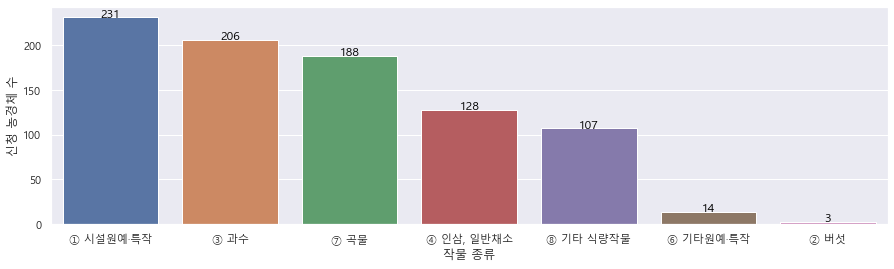

In [110]:
data['신청경영체수']=data.groupby('지자체명_시군구')['합계'].transform('count')
grouped_data=data.groupby('지자체명_시군구').agg({'신청경영체수': 'first', '합계': 'sum'}) #신청경영체수, 배정신청인원 합
grouped_data['평균배정신청인원'] = grouped_data['합계'] / grouped_data['신청경영체수']
top_data = grouped_data[grouped_data['평균배정신청인원'] >= 5].sort_values(by='평균배정신청인원', ascending=False)
top_data = data[data['지자체명_시군구'].isin(top_data.index)]
data1=count(top_data['작물 종류'])
bargraph('category','빈도수','작물 종류','신청 농경체 수',15,4,data1)

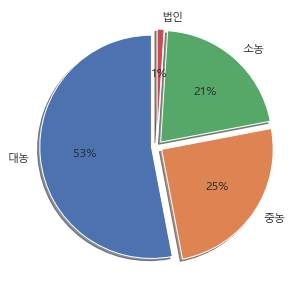

In [113]:
data1=count(top_data['구분'])
data1['비율']=round((data1['빈도수']/sum(data1['빈도수'])),2)
pie_chart(x=data1['category'],y=data1['비율'],data=data1,figsize1=5,figsize2=10)

### 7.2 평균 배정 신청 인원 2명 이하 하위 지자체 EDA

In [116]:
bottom_data = grouped_data[grouped_data['평균배정신청인원'] < 2].sort_values(by='평균배정신청인원', ascending=False)
bottom_df = data[data['지자체명_시군구'].isin(bottom_data.index)]

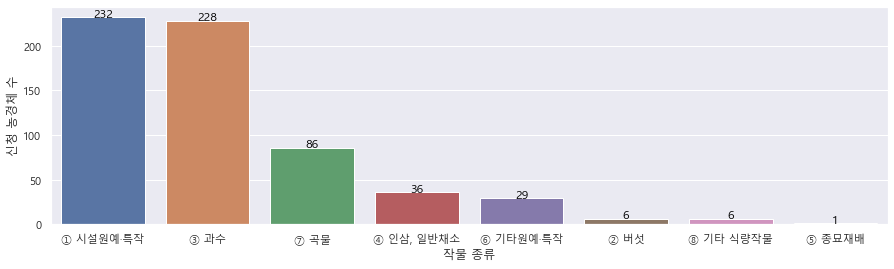

In [118]:
data1=count(bottom_df['작물 종류'])
bargraph('category','빈도수','작물 종류','신청 농경체 수',15,4,data1)

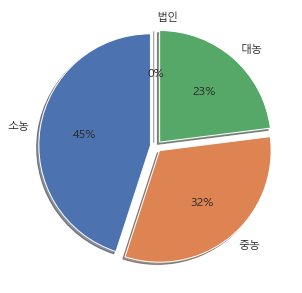

In [119]:
data1=count(bottom_df['구분'])
data1['비율']=round((data1['빈도수']/sum(data1['빈도수'])),2)
pie_chart(x=data1['category'],y=data1['비율'],data=data1,figsize1=5,figsize2=10)

### 7.3 고령농경체비율 기준 그룹화

In [121]:
data
data['고령화수준']=pd.cut(data['고령농경체비율'],
                    bins=[-float('inf'),50,60,float('inf')],
                    labels=['적정','평균','위험'])

In [123]:
# 2022년 고령농경체 비율 EDA

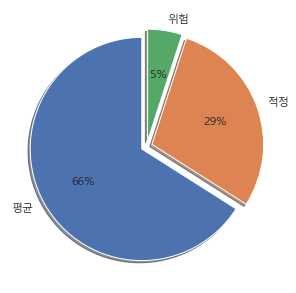

In [131]:
data_2022=data.query('비고==2022')
data1=count(data_2022['고령화수준'])
data1['비율']=round((data1['빈도수']/sum(data1['빈도수'])),2)
pie_chart(x=data1['category'],y=data1['비율'],data=data1,figsize1=5,figsize2=10)

In [132]:
# 2023년 고령농경체 비율 EDA

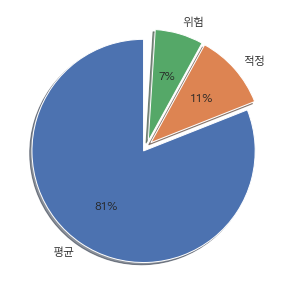

In [133]:
data_2022=data.query('비고==2023')
data1=count(data_2022['고령화수준'])
data1['비율']=round((data1['빈도수']/sum(data1['빈도수'])),2)
pie_chart(x=data1['category'],y=data1['비율'],data=data1,figsize1=5,figsize2=10)

### 7.4 고령화 위험 수준의 농업경영체 현황

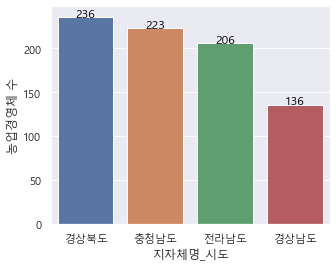

In [142]:
#고령화 위험 지역 시도 현황
data_danger=data[data['고령화수준']=='위험']
data1=count(data_danger['지자체명_시도'])
bargraph('category','빈도수','지자체명_시도','농업경영체 수',5,4,data1)

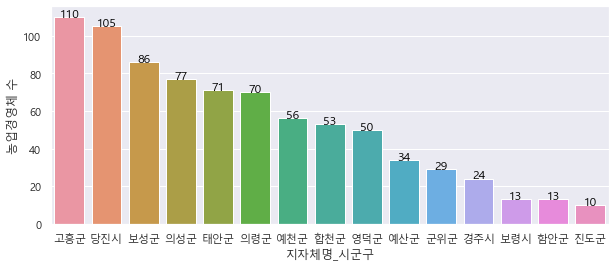

In [144]:
# 고령화 위험 지역 지자체 현황
data1=count(data_danger['지자체명_시군구'])
bargraph('category','빈도수','지자체명_시군구','농업경영체 수',10,4,data1)

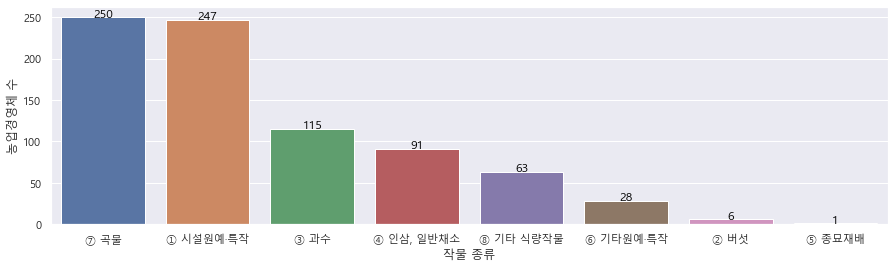

In [146]:
# 고령화 위험 지역 지자체 현황
data1=count(data_danger['작물 종류'])
bargraph('category','빈도수','작물 종류','농업경영체 수',15,4,data1)